# Diabetes Pateints Hospital Readmission Prediction
## using Machine Learning

Author: [Rohith Kumar Sajja](https://www.linkedin.com/in/rohithsajja)
***

## Data Source: UCI Machine Learning Repository

Link: [Diabetes 13-US hospitals for years 1999-2008 Data Set](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008 "UCI Repository")
***

## Table of Contents:

1. [Baseline Testing](#Baseline-Testing)
2. [Pre processing](#Pre-processing)
3. [Model Selection](#Model-Selection)

In [3]:
!pip install matplotlib
!pip install seaborn

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.


Loading all required packages such as pandas, numpy for data management.
Also loading packages for intuitive visualization such as seaborn and matplotlib

In [4]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt  

## Load and describe original dataset

In [5]:
original = pd.read_csv('diabetic_data.csv')

In [6]:
original.describe(include='all')

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,1.017660e+05,1.017660e+05,101766,101766,101766,101766,101766.000000,101766.000000,101766.000000,101766.000000,...,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,NaN,NaN,6,3,10,10,NaN,NaN,NaN,NaN,...,1,4,4,2,2,2,2,2,2,3
top,NaN,NaN,Caucasian,Female,[70-80),?,NaN,NaN,NaN,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
freq,NaN,NaN,76099,54708,26068,98569,NaN,NaN,NaN,NaN,...,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864
mean,1.652016e+08,5.433040e+07,NaN,NaN,NaN,NaN,2.024006,3.715642,5.754437,4.395987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.026403e+08,3.869636e+07,NaN,NaN,NaN,NaN,1.445403,5.280166,4.064081,2.985108,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.252200e+04,1.350000e+02,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.496119e+07,2.341322e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.523890e+08,4.550514e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,7.000000,4.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.302709e+08,8.754595e+07,NaN,NaN,NaN,NaN,3.000000,4.000000,7.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Reading the data set as a pandas data frame and separating the independent variables and the dependant variable

In [7]:
df = pd.read_csv('preprocessed_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [8]:
df.describe(include='all')


,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,diag_2_category_diabetes,diag_2_category_genitourinary,diag_2_category_other,diag_2_category_respiratory,diag_3_category_circulatory,diag_3_category_diabetes,diag_3_category_genitourinary,diag_3_category_other,diag_3_category_respiratory,readmitted
count,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,...,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,2.024017,3.715515,5.754459,4.396018,43.095909,1.339691,16.021835,0.369368,0.197842,0.635585,...,0.125723,0.082309,0.368110,0.107062,0.311783,0.168598,0.065643,0.381671,0.072305,0.111602
std,1.445414,5.279919,4.064110,2.985092,19.674220,1.705792,8.127589,1.267282,0.930485,1.262877,...,0.331539,0.274836,0.482294,0.309194,0.463224,0.374398,0.247658,0.485799,0.258994,0.314878
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
X.head()


,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,diag_2_category_circulatory,diag_2_category_diabetes,diag_2_category_genitourinary,diag_2_category_other,diag_2_category_respiratory,diag_3_category_circulatory,diag_3_category_diabetes,diag_3_category_genitourinary,diag_3_category_other,diag_3_category_respiratory
0,1,22,7,2,38,3,27,0,1,2,...,0,0,0,1,0,1,0,0,0,0
1,1,1,7,4,48,0,11,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,1,1,7,2,28,0,15,0,3,4,...,0,0,0,1,0,0,0,0,1,0
3,1,1,7,4,44,0,10,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,1,3,7,3,54,0,8,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [10]:
y.head()

,readmitted
0,0
1,0
2,0
3,0
4,0


In [11]:
X.shape


(101763, 57)

In [12]:
y.shape

(101763, 1)

# Intial Pre-processing

Impute null values with a constant value of 0

In [13]:
# imputer = SimpleImputer(strategy = 'constant', fill_value = 0)
imputer = SimpleImputer(strategy = 'most_frequent')
imputer.fit_transform(X)

array([[ 1, 22,  7, ...,  0,  0,  0],
       [ 1,  1,  7, ...,  0,  0,  0],
       [ 1,  1,  7, ...,  0,  1,  0],
       ...,
       [ 3,  2,  1, ...,  0,  0,  0],
       [ 1,  1,  7, ...,  0,  0,  0],
       [ 1,  1,  7, ...,  0,  0,  0]])

In [14]:
X

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,diag_2_category_circulatory,diag_2_category_diabetes,diag_2_category_genitourinary,diag_2_category_other,diag_2_category_respiratory,diag_3_category_circulatory,diag_3_category_diabetes,diag_3_category_genitourinary,diag_3_category_other,diag_3_category_respiratory
0,1,22,7,2,38,3,27,0,1,2,...,0,0,0,1,0,1,0,0,0,0
1,1,1,7,4,48,0,11,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,1,1,7,2,28,0,15,0,3,4,...,0,0,0,1,0,0,0,0,1,0
3,1,1,7,4,44,0,10,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,1,3,7,3,54,0,8,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,1,1,7,1,56,1,16,1,1,0,...,0,0,0,1,0,1,0,0,0,0
101759,1,1,7,6,51,1,17,0,0,0,...,1,0,0,0,0,1,0,0,0,0
101760,3,2,1,12,53,1,33,1,0,8,...,0,0,0,1,0,0,1,0,0,0
101761,1,1,7,9,41,2,17,3,0,0,...,0,0,0,1,0,1,0,0,0,0


View One Hot Encoded data - This changes attribute values to binary values column lists

We split the data using sklearn's train_test_split.

Note: In the train_test_split function, we are tuning the parameter stratify to yes as this would split the dataset in such a way that the proprtions of the target variable is conserved in training and testing data.

In [15]:
# X_train = pd.read_csv('X_train.csv')
# X_test = pd.read_csv('X_test.csv')
# y_train = pd.read_csv('y_train.csv')
# y_test = pd.read_csv('y_test.csv')

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

# Baseline Testing

Baseline tests will be performed using the DummyCLassifier from the module sklearn.dummy.
Here, we are considering four tests to classify the data set - most_frequent, stratified, prior, uniform, constant. The description of each of these test strategies is as follows:

***

### Test Strategies:
* _**stratified**_: generates predictions by respecting the training set’s class distribution.

* _**most_frequent**_: always predicts the most frequent label in the training set.

* _**prior**_: always predicts the class that maximizes the class prior (like “most_frequent”) and predict_proba returns the class prior.

* _**uniform**_: generates predictions uniformly at random.

* _**constant**_: always predicts a constant label that is provided by the user. This is useful for metrics that evaluate a non-majority class



Before using the algorithms, let us check the baseline accuracy by checking true positives.
This is essentially the same as using the constant = 1 strategy in DummyClassifier.

In [17]:
baseline_accuracy = len(df[df['readmitted'] == 1])/len(df)
print ("Baseline Accuracy by taking true positives: %.2f%%" % (baseline_accuracy*100))

Baseline Accuracy by taking true positives: 11.16%


In [18]:
strategies = [ 'uniform', 'constant'] 
  
test_scores = [] 
for s in strategies: 
    if s =='constant': 
        dclf = DummyClassifier(strategy = s, random_state = 0, constant = 1) 
    else: 
        dclf = DummyClassifier(strategy = s, random_state = 0) 
    dclf.fit(X_train, y_train) 
    score = dclf.score(X_test, y_test) 
    test_scores.append(score)

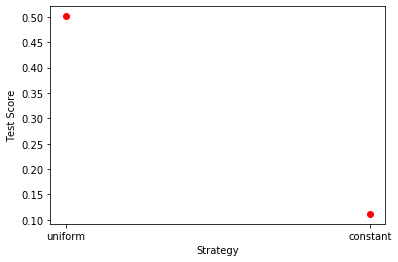

In [19]:
plt.plot(strategies, test_scores, 'ro'); 
plt.xlabel('Strategy')
plt.ylabel('Test Score')
plt.show()

In [20]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  white solid !important;
  color: white !important;
  text-align: center !important;
}
</style>

## Comparision of scores obtained for Baseline tests

In [21]:
from IPython.display import display, HTML

Load the training and test data split from pre-processing

In [22]:
tests = pd.DataFrame(strategies, columns = ['Test'])
accuracy = pd.DataFrame(test_scores, columns = ['Accuracy'])
baseline_scores = pd.concat([tests, accuracy], axis = 1)
baseline_scores.index = np.arange(1, len(baseline_scores)+1)
baseline_scores

,Test,Accuracy
1,uniform,0.501196
2,constant,0.111599


# Pre-processing

# Model Selection

### Loading required packages for MLP, XGBoost, RandomForest, KNN Classifiers

Primarily, we are using the sklearn module on Python

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.inspection import permutation_importance
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

## K Nearest Neighbor (KNN) Classifier

K Nearest Neighbor (KNN) 
 
 Confusion Matrix: 



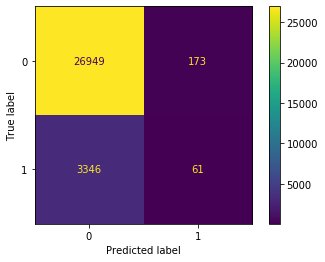

,Score
Accuracy,0.884733
Precision,0.260684
Recall,0.017904
F-score,0.033507
ROC AUC,0.505763
PR AUC,0.194094


In [31]:
knn = KNeighborsClassifier(n_neighbors = 4) 
knn.fit(X_train, y_train) 
knn_predictions = knn.predict(X_test)
knn_confusion = confusion_matrix(y_test, knn_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)
knn_roc_auc = roc_auc_score(y_test, knn_predictions)
precision, recall, thresholds = precision_recall_curve(y_test, knn_predictions)

print("K Nearest Neighbor (KNN) \n \n Confusion Matrix: \n")
knn_conf = plot_confusion_matrix(knn, X_test, y_test, values_format = '.0f')
plt.show()
knn_pr_auc = auc(recall, precision)

knn_scores = pd.DataFrame({'Score': [knn_accuracy, knn_precision, knn_recall, knn_f1, knn_roc_auc, knn_pr_auc]})
knn_scores.index = ['Accuracy', 'Precision', 'Recall', 'F-score', 'ROC AUC', 'PR AUC']
knn_scores

## XGBoost Classifer

XGBoost 
 
 Confusion Matrix: 



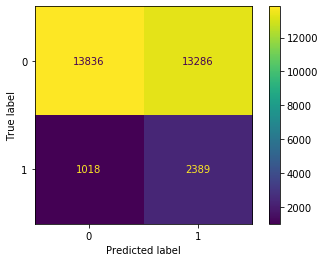

,Score
Accuracy,0.531462
Precision,0.152408
Recall,0.701203
F-score,0.250393
ROC AUC,0.605671
PR AUC,0.443479


In [32]:
xg = xgb.XGBClassifier(random_state=42, learning_rate=0.001, max_depth=5, eta=0.1, scale_pos_weight=10)
xg.fit(X_train,y_train)
xg_predictions = xg.predict(X_test)
xg_confusion = confusion_matrix(y_test, xg_predictions)
xg_accuracy = accuracy_score(y_test, xg_predictions)
xg_recall = recall_score(y_test, xg_predictions)
xg_precision = precision_score(y_test, xg_predictions)
xg_f1 = f1_score(y_test, xg_predictions)
xg_roc_auc = roc_auc_score(y_test, xg_predictions)
precision, recall, thresholds = precision_recall_curve(y_test, xg_predictions)
xg_pr_auc = auc(recall, precision)

print("XGBoost \n \n Confusion Matrix: \n")
xg_conf = plot_confusion_matrix(xg, X_test, y_test, values_format = '.0f')
plt.show()

xg_scores = pd.DataFrame({'Score': [xg_accuracy, xg_precision, xg_recall, xg_f1, xg_roc_auc, xg_pr_auc]})
xg_scores.index = ['Accuracy', 'Precision', 'Recall', 'F-score', 'ROC AUC', 'PR AUC']
xg_scores

## RandomForest Classifier

RandomForest 
 
 Confusion Matrix: 



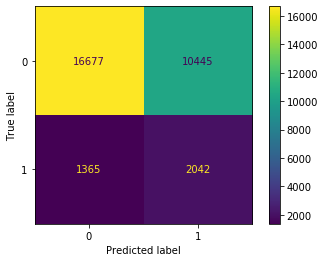

importance
number_inpatient                            0.203241
discharge_disposition_id                    0.094695
num_lab_procedures                          0.063462
num_medications                             0.062747
time_in_hospital                            0.056222
number_emergency                            0.050603
number_diagnoses                            0.041959
num_procedures                              0.028449
admission_type_id                           0.022865
number_outpatient                           0.020740
admission_source_id                         0.019720
age_5.0                                     0.012014
diag_1_category_respiratory                 0.011044
diag_1_category_circulatory                 0.010568
diag_3_category_circulatory                 0.009099
A1Cresult_None                              0.008894
age_8.0                                     0.008812
age_7.0                                     0.008811
metformin_No                       

,Score
Accuracy,0.613155
Precision,0.163530
Recall,0.599354
F-score,0.256952
ROC AUC,0.607121
PR AUC,0.403798


In [33]:
rf = RandomForestClassifier(max_depth=10, random_state=42, n_estimators=100,class_weight={0:1,1:9}, min_samples_split=5)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)
rf_confusion = confusion_matrix(y_test, rf_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)
rf_roc_auc = roc_auc_score(y_test, rf_predictions)
precision, recall, thresholds = precision_recall_curve(y_test, rf_predictions)
rf_pr_auc = auc(recall, precision)

print("RandomForest \n \n Confusion Matrix: \n")
rf_conf = plot_confusion_matrix(rf, X_test, y_test, values_format = '.0f')
plt.show()

feature_importances = pd.DataFrame(rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance',                                                                 ascending=False)
print(feature_importances)

rf_scores = pd.DataFrame({'Score': [rf_accuracy, rf_precision, rf_recall, rf_f1, rf_roc_auc, rf_pr_auc]})
rf_scores.index = ['Accuracy', 'Precision', 'Recall', 'F-score', 'ROC AUC', 'PR AUC']
rf_scores

## Multi Layer Perception (MLP) Classifier

Multi Layer Perception (MLP) 
 
 Confusion Matrix: 



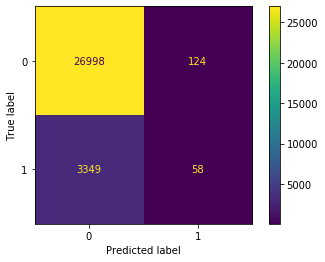

,Score
Accuracy,0.886239
Precision,0.318681
Recall,0.017024
F-score,0.032321
ROC AUC,0.506226
PR AUC,0.222702


In [30]:
mlp = MLPClassifier(hidden_layer_sizes=(128,64), max_iter=30, activation = 'relu',solver='adam')
mlp.fit(X_train, y_train)
mlp_predictions = mlp.predict(X_test)
mlp_confusion = confusion_matrix(y_test, mlp_predictions)
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
mlp_precision = precision_score(y_test, mlp_predictions)
mlp_recall = recall_score(y_test, mlp_predictions)  
precision, recall, thresholds = precision_recall_curve(y_test, mlp_predictions)
mlp_f1 = f1_score(y_test, mlp_predictions)
mlp_roc_auc = roc_auc_score(y_test, mlp_predictions)

mlp_f1 = f1_score(y_test, mlp_predictions)
mlp_roc_auc = roc_auc_score(y_test, mlp_predictions)
mlp_pr_auc = auc(recall, precision)

print("Multi Layer Perception (MLP) \n \n Confusion Matrix: \n")
mlp_conf = plot_confusion_matrix(mlp, X_test, y_test, values_format = '.0f')
plt.show()

mlp_scores = pd.DataFrame({'Score': [mlp_accuracy, mlp_precision, mlp_recall, mlp_f1, mlp_roc_auc, mlp_pr_auc]})
mlp_scores.index = ['Accuracy', 'Precision', 'Recall', 'F-score', 'ROC AUC', 'PR AUC']
mlp_scores

### Comparing prediction performance of models by accuracy

The scores below show an improvement in prediction using these algorithms, when compared to the Baseline scores obtained above

In [34]:
model_scores = pd.DataFrame({'Model': ['XGBoost', 'RandomForest', 'K Nearest Neighbor (KNN)', 'Multi Layer Perception (MLP)'],'Accuracy score': [xg_accuracy, rf_accuracy, knn_accuracy, mlp_accuracy], 'Precision Score': [xg_precision, rf_precision, knn_precision, mlp_precision], 'Recall Score': [xg_recall, rf_recall, knn_recall, mlp_recall], 'F-score': [xg_f1, rf_f1, knn_f1, mlp_f1], 'ROC AUC Score': [xg_roc_auc, rf_roc_auc, knn_roc_auc, mlp_roc_auc], 'Precision Recall AUC': [xg_pr_auc, rf_pr_auc, knn_pr_auc, mlp_pr_auc]})
model_scores.index = np.arange(1, len(model_scores)+1)
model_scores

,Model,Accuracy score,Precision Score,Recall Score,F-score,ROC AUC Score,Precision Recall AUC
1,XGBoost,0.531462,0.152408,0.701203,0.250393,0.605671,0.443479
2,RandomForest,0.613155,0.163530,0.599354,0.256952,0.607121,0.403798
3,K Nearest Neighbor (KNN),0.884733,0.260684,0.017904,0.033507,0.505763,0.194094
4,Multi Layer Perception (MLP),0.886239,0.318681,0.017024,0.032321,0.506226,0.222702
